# 29 — Performance Optimization (Fast plotting patterns)

## Goal
Make plots **fast** and responsive for large datasets and dashboards.

### What you'll learn
- Avoiding slow Python loops
- Downsampling / decimation strategies
- Rasterization for huge scatter plots
- Efficient animation updates (blitting)
- Performance-friendly defaults (markers, alpha, linewidth)
- When to use alternative libraries (Datashader, Plotly)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Big Scatter: Rasterize and Reduce Marker Cost
For huge scatter plots:
- Use smaller markers
- Avoid edgecolors
- Consider rasterization when saving vector formats

```python
sc = ax.scatter(x, y, s=1, alpha=0.3, rasterized=True)
```


=== LARGE SCATTER TEMPLATE ===


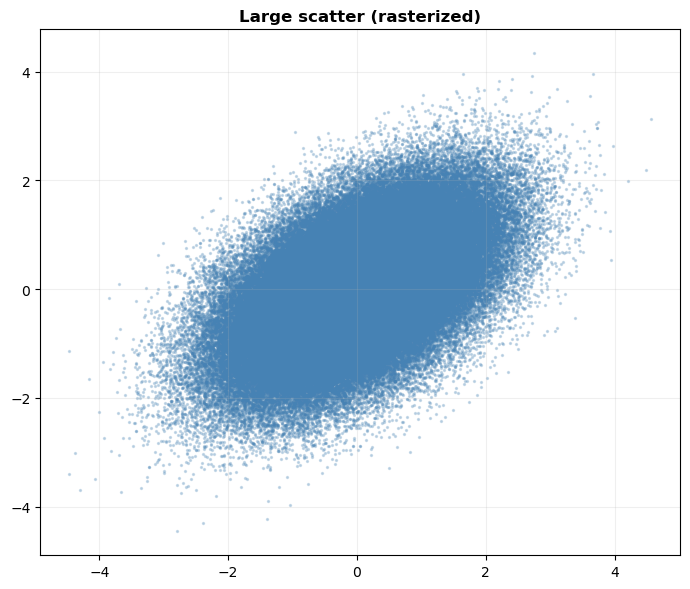

Render time (approx): 0.118 s


In [2]:
print('=== LARGE SCATTER TEMPLATE ===')
n = 200_000
x = np.random.randn(n)
y = 0.5*x + np.random.randn(n)*0.8

t0 = time.time()
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x, y, s=2, alpha=0.25, color='steelblue', rasterized=True)
ax.set_title('Large scatter (rasterized)', fontweight='bold')
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()
print('Render time (approx):', round(time.time() - t0, 3), 's')

## 2. Downsampling (Decimation)
When plotting dense time series, downsample to preserve shape while reducing points.

Common strategies:
- Plot every k-th point
- Aggregate into bins (min/max envelope)
- Resample in Pandas (`resample`)


=== TIME SERIES DOWNSAMPLING ===


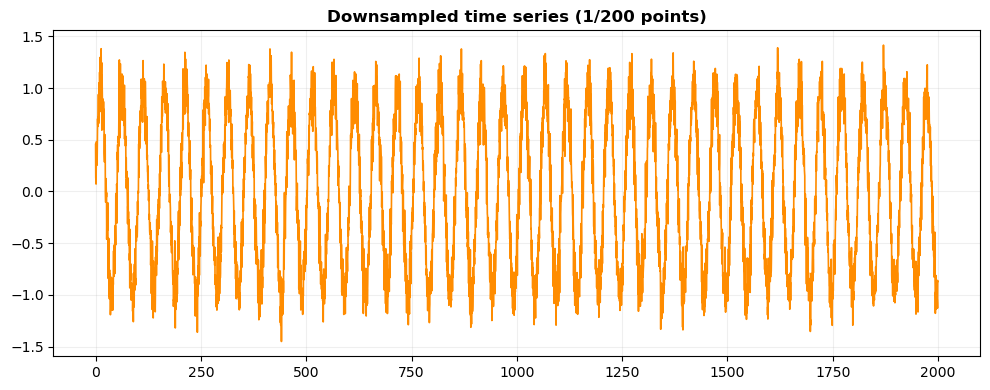

Original points: 1000000 | Plotted points: 5000


In [3]:
print('=== TIME SERIES DOWNSAMPLING ===')
n = 1_000_000
x = np.linspace(0, 2000, n)
y = np.sin(x/8) + 0.15*np.random.randn(n)

k = 200  # keep 1 out of k points
xs = x[::k]
ys = y[::k]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(xs, ys, lw=1.2, color='darkorange')
ax.set_title(f'Downsampled time series (1/{k} points)', fontweight='bold')
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()
print('Original points:', n, '| Plotted points:', len(xs))

## 3. Animation Speed: Update Artists, Don’t Re-plot
For animations, create artists once and update their data with `set_data` and `draw_idle`. Use `blit=True` when possible.


## Best Practices Checklist
- Prefer vectorized NumPy over Python loops for preparing data.
- Avoid expensive features on massive plots (markers with edges, heavy transparency).
- Use rasterization for huge scatter plots in PDF/SVG.
- Decimate/time-bin data for long signals.
- Consider purpose-built tools for millions of points (Datashader).

## Quick reference
```python
ax.scatter(x, y, s=2, alpha=0.3, rasterized=True)
ax.plot(x[::k], y[::k])
```
